<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW%26/LRtestAndMCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by FBB for DSPS 2019
# HW 7

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline
import scipy.stats as stats
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


# **PART** I Due Tuesday 10/22 at midnight

Read in the abstract, first paragaph of the main text and page three of [Nam et al. 2018](https://arxiv.org/pdf/1811.10212.pdf) which should be sufficient to give you an idea of the problem context., 

# 1 Get the data 
from the Harvard Dataverse open data repository (well curated and organized open data repositories are a blessing in science and data science - they enable reproducibility! - This one is a great one.)

Use ```wget``` and the link in the paper (page 17). YOu want the data for Fig 1 insert G.


In [3]:
# download Fig.+1-G.dat
!wget https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ


In [2]:
nam18 = pd.read_csv('Fig.+1-G.dat', delim_whitespace=True, header=None)
nam18 = nam18.apply(pd.to_numeric, errors='coerce')
nam18.head()

,0,1,2,3,4,5,6,7,8,9
0,0.247,0.000000,0.114,NaN,1.998,-0.6682,0.236,NaN,0.0,0.000000
1,0.270,0.264431,0.291,NaN,3.008,0.0000,1.640,0.000,1.0,0.000163
2,0.290,0.247896,0.290,NaN,4.013,1.1170,2.500,0.200,1.5,0.007934
3,0.330,0.232262,0.330,NaN,5.006,2.4760,3.999,1.538,2.0,0.058189
4,0.379,0.233420,0.380,NaN,6.015,4.4130,5.000,2.866,2.5,0.198115


# Data Wrangling and visualization



Write *a single line of code* that does the following (in whichever order you want):

- removes all columns you do not need. 
- removes Nan values that appear in the relevant columns.
- renames the columns according to the notation on in the paper figure (Fig 1 insert G)

Writing this in a single line of code is the "pythonic" way to do it - meaning its in the conding style of the language. You can do it by concatenating methods that do wach step, like ```df.method1(...).method2(...).method3(...)```
and as long as each method returns a dataframe another method can be appended. The code will be run left to right with the next method running on the dataframe returned by the previous one.

Note that you can use latex notation for the lables, e.g.:
```str=r"\Delta^2"```
would look like what you wrote when you look at the column names, but would look like 

$\Delta^2$ 

in the plot label if plotting with df.plot()



In [3]:
nam18_reducted = nam18[[2,1]].dropna().rename(columns={2: "temp", 1: "nstar"})
nam18_reducted.head()

,temp,nstar
0,0.114,0.000000
1,0.291,0.264431
2,0.290,0.247896
3,0.330,0.232262
4,0.380,0.233420


Text(0, 0.5, '$n^*$ ($10^9$ cm $^{-2}$)')

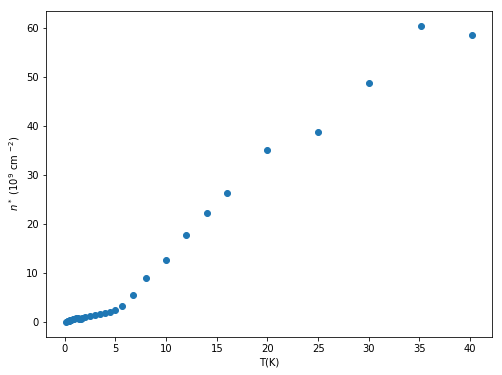

In [4]:
pl.figure(figsize=(8, 6))
pl.scatter(nam18_reducted.temp, nam18_reducted.nstar)
pl.xlabel('T(K)')
pl.ylabel('$n^*$ ($10^9$ cm $^{-2}$)')

Figure 1. The temperature dependence of $n^*(T)$ from measurements. $n^*(T)$ increases at higher T. 

# 677 and Extra Credit

Create a function that generates a polynomial of any degree.

Functions can take variable number of arguments if passed as a tuple with a * (this is a pointer. If you coded in C you know this syntax.)

What I mean by that is that I can create a function as:


In [5]:
def unspecifiedArgumentFunction(*a):
    print ("the number of elements passed in argument 'a' is: ", len(a))
    for i in range(len(a)):
        print ("Argument {} is {}".format(i, a[i]))
        
unspecifiedArgumentFunction(*[0,1,2])          

the number of elements passed in argument 'a' is:  3
Argument 0 is 0
Argument 1 is 1
Argument 2 is 2


In [6]:
unspecifiedArgumentFunction(*["hello", [0,1,2]])          

the number of elements passed in argument 'a' is:  2
Argument 0 is hello
Argument 1 is [0, 1, 2]


So based on this create a function that takes the _x_ vector (exogenous variable) and a pointer to n coefficients. Those will be the parameters of the polynomial and it will be a list of 2 elements for a line (slope and intercept), of 3 elements for a second degree polynomial, 4 for a third etc etc. Fit this with scipy.optimize.curve_fit fitting a polynomial of 1st (line), 2nd (parabola), and 3rd degree.

In [7]:
def polynomial(x, *a):
    '''generate a polynomial of any degree'''
    result = 0
    for i, ai in enumerate(a):
        result += x**i * ai
    return result


Text(0, 0.5, '$n^*$')

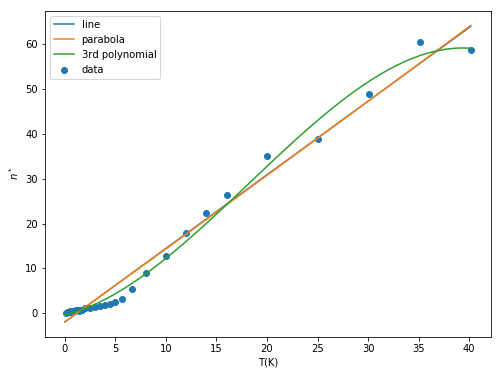

In [52]:
x = nam18_reducted.temp.values
y = nam18_reducted.nstar.values
# fit line
popt_1, pcov_1 = curve_fit(polynomial, xdata=x, ydata=y, p0=[1, 0])

# fit parabola
popt_2, pcov_2 = curve_fit(polynomial, xdata=x, ydata=y, p0=[1, 0, 0])

# fit 3rd degree 
popt_3, pcov_3 = curve_fit(polynomial, xdata=x, ydata=y, p0=[1, 0, 0, 0])

x_fit = np.linspace(0, nam18_reducted.temp.max(), 50)
yfit_1 = polynomial(x_fit, *popt_1)
yfit_2 = polynomial(x_fit, *popt_2)
yfit_3 = polynomial(x_fit, *popt_3)

# plot 
pl.figure(figsize=(8, 6))

pl.scatter(x, y, label='data')
pl.plot(x_fit, yfit_1, label='line')
pl.plot(x_fit, yfit_2, label='parabola')
pl.plot(x_fit, yfit_3, label='3rd polynomial')
pl.legend()
pl.xlabel('T(K)')
pl.ylabel('$n^*$')

Figure 2. Fit a polynomial of 1st (line), 2nd (parabola), and 3rd degree to the temperature dependence of $n^*$ from measurements.

# 3 Model

Use the statsmodels.formula.api package to run Ordinary Linear Fits (ols) and fit a line, a second degree polynomial and a third degree polynomial to the data. For each model extract the log-likelihood and print it out explicitally for each mode. How do the lof-likelihoods compare for the three models? does it make sense? explain. Just by reading the log-likelihood value can you say which model is better? Discuss

Note: if you followed the instructions and renamed variables as I asked you to above, you will encounter an issue here, Although pandas know how to render the string in the plot, statsmodels has issues with parsing a complex string with characters such as "(" or latex inputs.

> The line and parabola model have the same log likelihood. The order 3 polynomial model has the highest log likelihood. That makes sense because the 3 order polynomial has the least square root loss. Based on the value of log likelihood, the order 3 polynomial model is better. 

In [172]:
!pip install statsmodels

    100% |████████████████████████████████| 10.5MB 648kB/s ta 0:00:01
    100% |████████████████████████████████| 235kB 1.2MB/s ta 0:00:01


In [12]:
import statsmodels.formula.api as smf


In [13]:
df = nam18_reducted
df.columns

Index(['temp', 'nstar'], dtype='object')

In [14]:
# fit line

model1 = smf.ols(formula='nstar ~ temp', data=df).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nstar   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1816.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.97e-30
Time:                        15:54:01   Log-Likelihood:                -78.850
No. Observations:                  35   AIC:                             161.7
Df Residuals:                      33   BIC:                             164.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9431      0.492     -3.950      0.000      -2.944      -0.942
temp           1.6405      0.038     42.611      0.000       1.562       1.719
==============================================================================
Omnibus:                        1.162   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                0.973
Skew:                          -0.393   Prob(JB):                        0.615
Kurtosis:                       2.775   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# fit parabola

model2 = smf.ols(formula='nstar ~ temp + I(temp**2)', data=df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nstar   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     881.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.05e-28
Time:                        15:54:11   Log-Likelihood:                -78.835
No. Observations:                  35   AIC:                             163.7
Df Residuals:                      32   BIC:                             168.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.8899      0.592     -3.191      0.003      -3.096      -0.683
temp             1.6196      0.131     12.365      0.000       1.353       1.886
I(temp ** 2)     0.0006      0.004      0.167      0.869      -0.007       0.008
==============================================================================
Omnibus:                        1.380   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.042
Skew:                          -0.418   Prob(JB):                        0.594
Kurtosis:                       2.877   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model3 = smf.ols(formula='nstar ~ temp + I(temp**2) + I(temp**3)', data=df).fit()

model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nstar   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1486.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           1.46e-33
Time:                        15:54:15   Log-Likelihood:                -62.232
No. Observations:                  35   AIC:                             132.5
Df Residuals:                      31   BIC:                             138.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3607      0.433     -0.832      0.412      -1.245       0.523
temp             0.5471      0.174      3.142      0.004       0.192       0.902
I(temp ** 2)     0.0874      0.013      6.930      0.000       0.062       0.113
I(temp ** 3)    -0.0016      0.000     -7.004      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                2.558
Skew:                          -0.424   Prob(JB):                        0.278
Kurtosis:                       4.018   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:

print("line model log-likelihood: {}".format(-78.835))
print("parabola model log-likelihood: {} ".format(-78.835))
print("order 3 polynomial model log-likelihood: {}".format(-62.232))


line model log-likelihood: -78.835
parabola model log-likelihood: -78.835 
order 3 polynomial model log-likelihood: -62.232


# 4 plot the three models over the data. Use the polynomial function you created in the 667/EC if you did. 
Make sure you create a new x vector that samples densely the range spanned by the temperature variabla in your data, or your models, which should be plotted with lines, will look broken-up

Text(0, 0.5, '$n^*$ ($10^9$ cm $^{-2}$)')

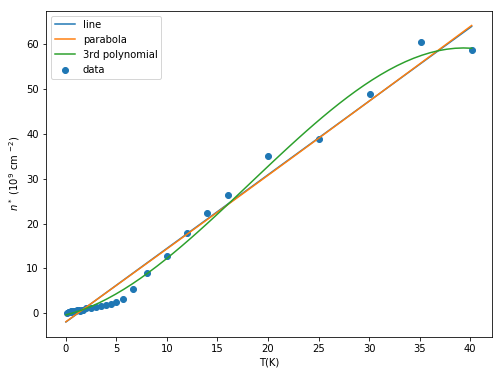

In [20]:
x = pd.DataFrame(np.linspace(0, df.temp.max(), 50), columns=['temp'])
y_pred1 = model1.predict(x)
y_pred2 = model2.predict(x)
y_pred3 = model3.predict(x)

# plot 
pl.figure(figsize=(8, 6))

pl.scatter(df.temp, df.nstar, label='data')
pl.plot(x, y_pred1, label='line')
pl.plot(x, y_pred2, label='parabola')
pl.plot(x, y_pred3, label='3rd polynomial')
pl.legend()
pl.xlabel('T(K)')
pl.ylabel('$n^*$ ($10^9$ cm $^{-2}$)')

Figure 3. Fit a polynomial of 1st (line), 2nd (parabola), and 3rd degree to the temperature dependence of $n^*$ from measurements using ```statsmodel```.

# 5 *formally* compare the models with a test that returns a p-value assessment (NHRT) to determine which model is best. Sort the models from the best one to the worse one.

In [35]:
# set a threshold, if p<alpha, reject the null hypothesis
alpha = 0.05

In [46]:
# likelihood ratio test

# compare model 2 and 1
lr, p, diff = model2.compare_lr_test(model1)
print('Is model 1 better than model 2? ', p>alpha)

Is model 1 better than model 2?  True


In [47]:
# compare model 3 and 1
lr, p, diff = model3.compare_lr_test(model1)
print('Is model 1 better than model 3? ', p>alpha)

Is model 1 better than model 3?  False


In [48]:
# compare model 3 and 2
lr, p, diff = model3.compare_lr_test(model2)
print('Is model 2 better than model 3? ', p>alpha)


Is model 2 better than model 3?  False


In [50]:
print("The models from best to worst: model 3 > model 1 > model 2 ")

The models from best to worst: model 3 > model 1 > model 2 


### Install emcee

In [2]:
!pip install emcee


    100% |████████████████████████████████| 61kB 196kB/s ta 0:00:01


In [54]:
import emcee

# **PART** II Due Friday 10/25 at midnight

# 6. Create a column with made up uncertainties: draw them as gaussian random variables from a gaussian centered at 0 and with a standard deviation of 10

In [55]:
nam18_reducted["uncertainties"] = 10 * np.random.randn(len(nam18_reducted.temp))

# 7. Set up EMCEE for a MCMC model optimization

Create a log-likelihood function like in the example https://emcee.readthedocs.io/en/stable/tutorials/line/. Note that the model generated in the emcee example is assuming a line model but also assuming that the uncertainties are underestimated! That is a really fun exercise! however, you do not have to do this part: modify the likelihood function (and prior etc) removing the piece referring to the uncertainty underestimation. Set a prior that limits the slope to positive values and the intercept to values between -10 and 10.

In [253]:
def log_likelihood(theta, x, y, yerr):
    
    m, b = theta
    model = m * x + b
    sigma2 = yerr**2
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))


def log_prior(theta):
    
    m, b = theta
    # uniform prior
    if m > 0.0 and -10.0 < b < 10.0:
        return 0.0
    return -np.inf


def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf

    return lp + log_likelihood(theta, x, y, yerr)


# 8 Run the emcee with 50 walkers and chains 3000 elements long

In [254]:
nwalkers = 50
ndim = 2    # number of parameters
x = nam18_reducted.temp.values
y = nam18_reducted.nstar.values
yerr = nam18_reducted.uncertainties.values

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))

m0, b0 = 1, -1
pos =np.array([m0, b0]) + np.abs( np.random.randn(nwalkers, ndim) ) # initial parameters for 50 walkers, nwalker*ndim
sampler.run_mcmc(initial_state=pos, nsteps=3000, progress=True);


100%|██████████| 3000/3000 [00:07<00:00, 428.04it/s]


# 9. plot the chains for slope and intercept, labelled accordingly. Remove from the chain the first 50 points. Discuss why that is a good idea.

In [240]:
samples.shape

(3000, 50, 3)

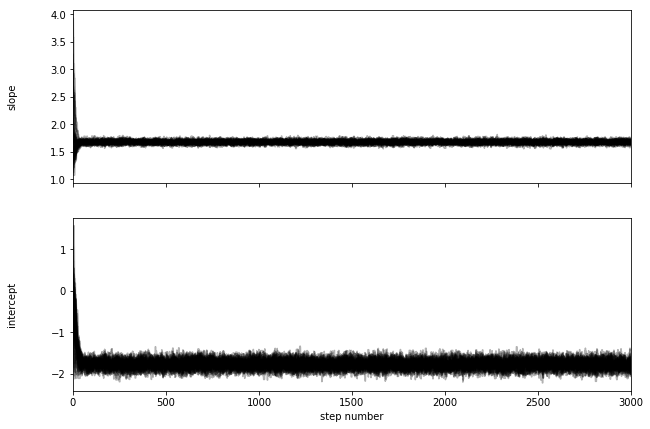

In [260]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["slope", "intercept"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


Figure 4. Fit a line using MCMC. The final values of slope and intercept are close to results from ```statsmodels``` and ```curve_fit```.

# Install the corner module

In [101]:
!pip install corner

  Running setup.py bdist_wheel for corner ... done
  Stored in directory: /Users/home/Library/Caches/pip/wheels/70/d8/e5/e0e7974a2a5757483ea5a180c937041cf6872dc9993d78234a
Successfully built corner


In [102]:
import corner

# 10 plot the "marginalized posterior distributions" with the corner plot package
label the axis "slope" and "intercept" appropriately

In [257]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)


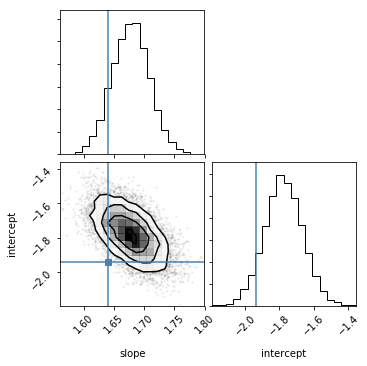

In [258]:
fig = corner.corner(flat_samples, labels=['slope', 'intercept'], truths=[1.64, -1.94])


Figure 5. The contour plot of samples. The final values of slope and intercept are close to results from ```statsmodels``` and ```curve_fit```.

#  EC Repeat for a parabola fit (this should be very quick now that you did the line fit! you need to define a new slightly different likelihood and prior, )

In [267]:
def log_likelihood(theta, x, y, yerr):
    
    a, b, c = theta
    model = a * x**2 + b * x + c
    # model = polynomial(x, *theta)
    sigma2 = yerr**2
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

def log_prior(theta):
    
    a, b, c = theta
    # uniform prior
    if a > 0.0 and  b > 0.0 and -10.0 < c < 10.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf

    return lp + log_likelihood(theta, x, y, yerr)


In [268]:
nwalkers = 50
ndim = 3    # number of parameters
x = nam18_reducted.temp.values
y = nam18_reducted.nstar.values
yerr = nam18_reducted.uncertainties.values

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))

a0, b0, c0 = 1, 1, 1
pos =np.array([a0, b0, c0]) + np.abs(np.random.randn(nwalkers, ndim)) # initial parameters for 50 walkers, nwalker*ndim
sampler.run_mcmc(initial_state=pos, nsteps=3000, progress=True);


100%|██████████| 3000/3000 [00:08<00:00, 359.31it/s]


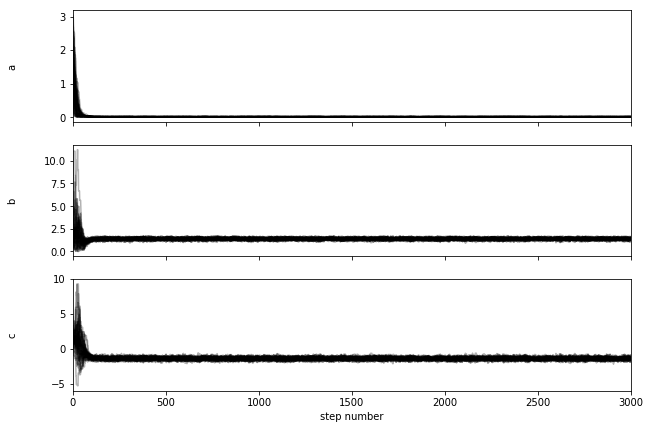

In [269]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b", "c"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


Figure 6. Fit a parabola using MCMC. The final values of slope and intercept are close to results from ```statsmodels``` and ```curve_fit```.

In [270]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)


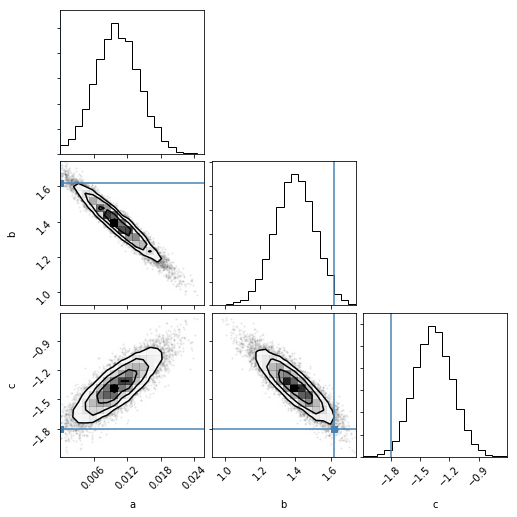

In [271]:
fig = corner.corner(flat_samples, labels=['a', 'b', 'c'], truths=[0., 1.62, -1.8])


Figure 7. The contour plot of samples. The final values of slope and intercept are close to results from ```statsmodels``` and ```curve_fit```.